In [1]:
# import libraries and read in the csv file
import re as re, pandas as pd, numpy as np
df = pd.read_csv('items.csv')
df.head()

,neighborhood,title,price,bedrooms,pid,longitude,date,link,latitude,sqft,sourcepage
0,(SOMA / south beach),"1bed + Den, 1bath at Mission Bay",$2895,/ 1br - 950ft² -,4046628359,-122.399663,Sep 4 2013,/sfc/apa/4046628359.html,37.774623,/ 1br - 950ft² -,http://sfbay.craigslist.org/sfc/apa/
1,(SOMA / south beach),Love where you live!,$3354,/ 1br - 710ft² -,4046761563,NaN,Sep 4 2013,/sfc/apa/4046761563.html,NaN,/ 1br - 710ft² -,http://sfbay.craigslist.org/sfc/apa/
2,(inner sunset / UCSF),We Welcome Your Furry Friends! Call Today!,$2865,/ 1br - 644ft² -,4046661504,-122.470727,Sep 4 2013,/sfc/apa/4046661504.html,37.765739,/ 1br - 644ft² -,http://sfbay.craigslist.org/sfc/apa/
3,(financial district),Golden Gateway Commons | 2BR + office townhous...,$5500,/ 2br - 1450ft² -,4036170429,NaN,Sep 4 2013,/sfc/apa/4036170429.html,NaN,/ 2br - 1450ft² -,http://sfbay.craigslist.org/sfc/apa/
4,(lower nob hill),Experience Luxury Living in San Fransisco!,$3892,/ 2br -,4046732678,NaN,Sep 4 2013,/sfc/apa/4046732678.html,NaN,/ 2br -,http://sfbay.craigslist.org/sfc/apa/


# 1. Cleaning the price, bedrooms and sqft fields

In [2]:
#code below removes the dollar sign from the price
df.price = df.price.str.strip('$').astype('float64')
df.price.head()

0    2895
1    3354
2    2865
3    5500
4    3892
Name: price, dtype: float64

In [3]:
# Cleaning the number of bedrooms field by removing the padded whitespace, and other characters
for i in df.index:
    r = re.search('(?<=\/ )(\d+)(?=br)', df.bedrooms[i])
    df.bedrooms[i] = r.group(0) if r else np.nan

/Users/Alan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
df.bedrooms = df.bedrooms.astype('float64')
df.bedrooms.head(9)

0     1
1     1
2     1
3     2
4     2
5     1
6   NaN
7     1
8     2
Name: bedrooms, dtype: float64

Cleaning up the sqft field

In [5]:
df.sqft.head()

0        / 1br - 950ft² -    
1        / 1br - 710ft² -    
2        / 1br - 644ft² -    
3       / 2br - 1450ft² -    
4                 / 2br -    
Name: sqft, dtype: object

In [6]:
# Cleaning up the sqrt field using regular expressions
for i in df.index:
    r = re.search('(?<=\/ )([0-9]+br \- )?(\d+)(?=ft)', df.sqft[i])
    df.sqft[i] = r.group(2) if r else np.nan #selecting the second group of the regular expression which c
                                            # values required.

/Users/Alan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
df.sqft = df.sqft.astype('float64')
df.sqft.head()

0     950
1     710
2     644
3    1450
4     NaN
Name: sqft, dtype: float64

# 2. Calculate the mean, minimum, and maximum rent price, bedrooms and square footage

In [8]:
def getMeanMinMax(variable, df): # function takes in the field name and dataframe
    mean = df[variable].mean() # determines the mean value
    minimum = df[variable].min() # determines the minimum value
    maximum = df[variable].max() # determines the maximum value
    print 'The mean ' + variable + ' is ' + str(mean)
    print 'The minimum ' + variable + ' is ' + str(minimum)
    print 'The maximum ' + variable + ' is ' + str(maximum)

In [9]:
# For the price, the mean, max and min is given as;
getMeanMinMax('price', df)

The mean price is 4196.67602808
The minimum price is 195.0
The maximum price is 45000.0


In [10]:
# For the bedrooms, the mean, max and min is given as;
getMeanMinMax('bedrooms', df)

The mean bedrooms is 1.921875
The minimum bedrooms is 1.0
The maximum bedrooms is 7.0


In [11]:
# For the sqft, the mean, max and min is given as;
getMeanMinMax('sqft', df)

The mean sqft is 1162.64748201
The minimum sqft is 300.0
The maximum sqft is 6000.0


# 3. Create a subset dataframe with listings between \$200 and \$10,000, and excluding listings with missing values on bedrooms or square footage

In [12]:
# creating a subset dataframe
ds = df[((df.price > 200) & (df.price < 10000)) & ((~np.isnan(df.bedrooms)) & (~np.isnan(df.sqft)))]

In [13]:
print len(ds), len(df)

347 1000


# 4. Calculate the mean, minimum, and maximum rent price, bedrooms, and square footage on this filtered subset

In [14]:
# For the price, the mean, max and min is given as;
getMeanMinMax('price', ds) # finding the required parameters for price in the subset dataframe

The mean price is 4374.26224784
The minimum price is 1450.0
The maximum price is 9975.0


In [15]:
# For the bedrooms, the mean, max and min is given as;
getMeanMinMax('bedrooms', ds) # finding the required parameters for bedrooms in the subset dataframe

The mean bedrooms is 1.94524495677
The minimum bedrooms is 1.0
The maximum bedrooms is 7.0


In [16]:
# For the sqft, the mean, max and min is given as;
getMeanMinMax('sqft', ds)

The mean sqft is 1197.59942363
The minimum sqft is 300.0
The maximum sqft is 4460.0


# 5. Create histogram plots of the full dataset and the filtered dataset, for price, bedrooms and sqft

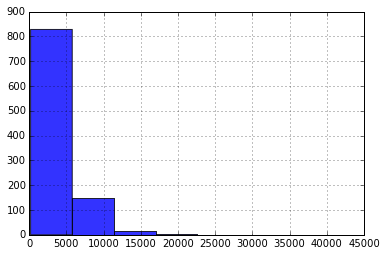

In [17]:
# Price full dataset
%matplotlib inline
# prettier this time - define the color, opacity, and number of bins
df['price'].hist(color = 'b', alpha =0.8, bins = 8)

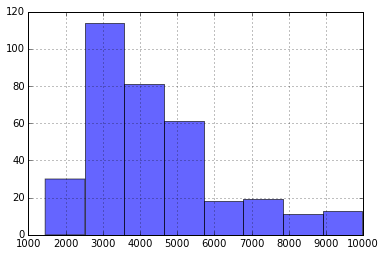

In [18]:
# Price subset dataset
%matplotlib inline
# prettier this time - define the color, opacity, and number of bins
ds['price'].hist(color='b', alpha = 0.6, bins=8)

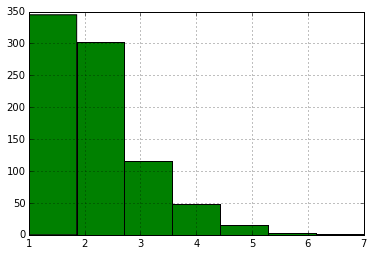

In [19]:
# Bedrooms full dataset
%matplotlib inline
# prettier this time - define the color, opacity, and number of bins
df['bedrooms'].hist(color='g', bins=7)

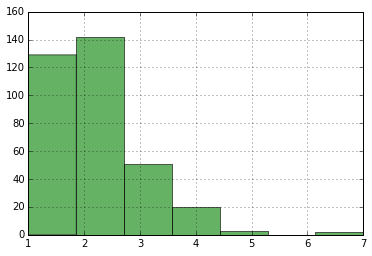

In [20]:
# Bedrooms subset dataset
%matplotlib inline
# prettier this time - define the color, opacity, and number of bins
ds['bedrooms'].hist(color='g', alpha = 0.6, bins=7)

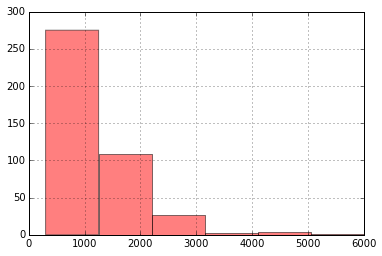

In [21]:
# Sqft full dataset
%matplotlib inline
# prettier this time - define the color, opacity, and number of bins
df['sqft'].hist(color='r', alpha = 0.5, bins=6)

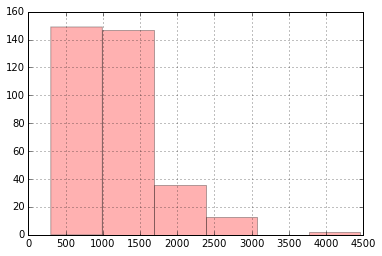

In [22]:
# Sqft full dataset
%matplotlib inline
ds['sqft'].hist(color='r', alpha = 0.3, bins=6)